In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv('Resume.csv')

In [21]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [22]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [23]:
df.isna().sum()

Category    0
Resume      0
dtype: int64

In [24]:
k=df['Category'].value_counts()

In [25]:
k.index

Index(['Java Developer', 'Testing', 'DevOps Engineer', 'Python Developer',
       'Web Designing', 'HR', 'Hadoop', 'Data Science', 'Sales',
       'Mechanical Engineer', 'ETL Developer', 'Operations Manager',
       'Blockchain', 'Arts', 'Database', 'Electrical Engineering',
       'Health and fitness', 'PMO', 'DotNet Developer', 'Business Analyst',
       'Automation Testing', 'Network Security Engineer', 'SAP Developer',
       'Civil Engineer', 'Advocate'],
      dtype='object')

In [26]:
values=k.index

In [27]:
counts=k.values

In [28]:
counts

array([84, 70, 55, 48, 45, 44, 42, 40, 40, 40, 40, 40, 40, 36, 33, 30, 30,
       30, 28, 28, 26, 25, 24, 24, 20], dtype=int64)

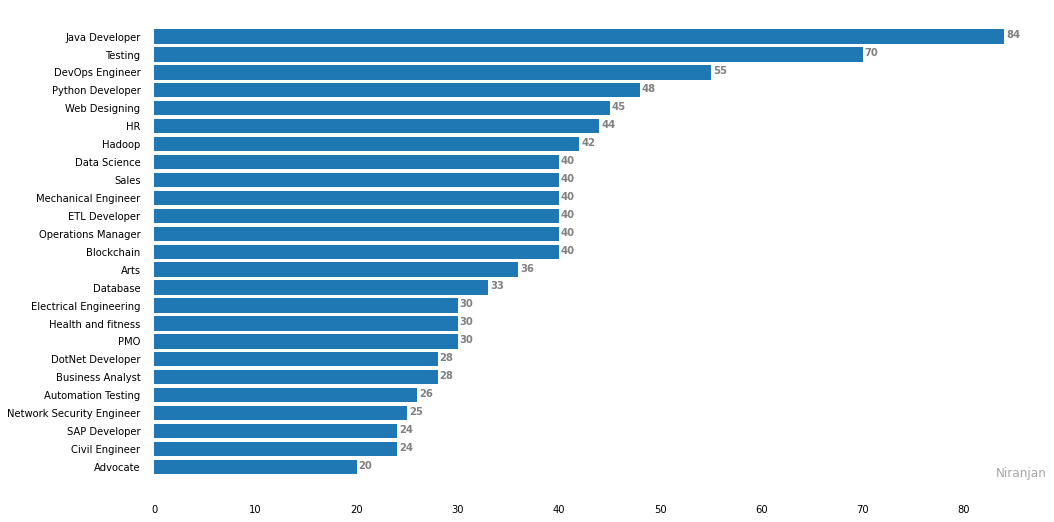

In [29]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(values, counts)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
fig.text(0.9, 0.15, 'Niranjan', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
plt.show()

In [30]:
import nltk


In [31]:
from nltk.corpus import stopwords

In [32]:
#from wordcloud import WordCloud

In [33]:
df['cleaned_text']=''

In [34]:
df

,Category,Resume,cleaned_text
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [35]:
import re

In [36]:
##clean th resume
##remove tags special non essential charecters

def clean(resume):
    resume=re.sub('httpS+s*',' ',resume)
    resume=re.sub('RT|cc',' ',resume)
    resume=re.sub('#S+',' ',resume)
    resume=re.sub('@S+','  ',resume)
    resume=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resume)
    resume=re.sub(r'[^x00-x7f]',r' ', resume)
    resume=re.sub('s+',' ',resume)
    resume=resume.lower()
    return resume

    
    
    

In [37]:
df['cleaned_text']=df['Resume'].apply(lambda x: clean(x))

In [38]:
df

,Category,Resume,cleaned_text
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language p thon panda ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail ma 2013 to ma 2017 b e ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area of intere t deep learning control s te...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r p thon sap hana table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skill proficient in ms office ...
958,Testing,â Willingness to accept the challenges. â ...,willingne to a ept the challenge po...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerne...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power ...


In [39]:
len(df)

962

In [40]:
corpus=" "
for i in range(0,962):
    corpus= corpus+ df["cleaned_text"][i]

In [41]:
corpus[1000:2500]

'urance  technology assisted review  tar  technolog  a i ted review  a i t  in a elerating the review proce  and run anal tic  and generate report      core member of a team helped in developing automated review platform tool from  cratch for a i ting e di cover  domain  thi  tool implement  predictive coding and topic modelling b  automating review   re ulting in reduced labor co t  and time  pent during the law er  review     under tand the end to end flow of the  olution  doing re earch and development for cla ification model   predictive anal  i  and mining of the information pre ent in text data  worked on anal  ing the output  and preci ion monitoring for the entire tool     tar a i t  in predictive coding  topic modelling from the evidence b  following ey  tandard   developed the cla ifier model  in order to identif   red flag   and fraud related i ue      tool    technologie   p thon   cikit learn  tfidf  word2vec  doc2vec  co ine  imilarit   na  ve ba e   lda  nmf for topic mo

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le=LabelEncoder()

In [44]:
y=df['Category']

In [45]:
y=le.fit_transform(y)

In [46]:
y

array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 22

In [47]:
X=df['cleaned_text']

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [49]:
vect=CountVectorizer(encoding='utf-8',lowercase=False)
tf=TfidfVectorizer(max_features=2000,sublinear_tf=True,norm='l1',stop_words='english',lowercase=False)

In [50]:

#vect.fit(X)
#X=vect.transform(X)

In [51]:
tf.fit(X)

TfidfVectorizer(lowercase=False, max_features=2000, norm='l1',
                stop_words='english', sublinear_tf=True)

In [52]:
X_trans=tf.transform(X)

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [55]:
from sklearn.linear_model import LogisticRegression
lr=OneVsRestClassifier(LogisticRegression())

In [56]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
from sklearn.metrics import f1_score,accuracy_score

In [59]:
m=OneVsRestClassifier(MultinomialNB())

In [60]:
s=StratifiedShuffleSplit(n_splits=5,test_size=0.3,random_state=42)

In [61]:
f1=[]
accuracy=[]
clf=OneVsRestClassifier(KNeighborsClassifier())
for t_index,te_index in s.split(X_trans,y):
    X_train,y_train=X_trans[t_index],y[t_index]
    X_test,y_test=X_trans[te_index],y[te_index]
    sgd.fit(X_train,y_train)
    f1.append(f1_score(y_test,sgd.predict(X_test),average='micro'))
    accuracy.append(accuracy_score(y_test,sgd.predict(X_test)))
    

In [62]:
f1

[0.9965397923875432,
 0.9965397923875432,
 0.986159169550173,
 0.9930795847750865,
 0.9896193771626297]

In [63]:
accuracy

[0.9965397923875432,
 0.9965397923875432,
 0.986159169550173,
 0.9930795847750865,
 0.9896193771626297]

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_t,X_te,y_t,y_te=train_test_split(X_trans,y,test_size=0.2,random_state=42)

In [66]:
m.fit(X_t,y_t)

OneVsRestClassifier(estimator=MultinomialNB())

In [67]:
y_pred=m.predict(X_test)

In [68]:
y_pred

array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 12, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 12, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15

In [69]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [70]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_t, y_t)
prediction = clf.predict(X_te)

In [71]:
print(accuracy_score(y_te,prediction))

0.9222797927461139


In [72]:
from sklearn.svm import SVC

In [73]:
from sklearn.model_selection import RandomizedSearchCV


In [74]:
di={
    'C':[1.0,0.9,0.8,1.2,1.5,2,0.5],
    'kernel':['rbf','linear']
}

In [75]:
search=RandomizedSearchCV(SVC(),di,n_iter=10,cv=5,random_state=2)

In [76]:
k=search.fit(X_train,y_train)

In [77]:
k.cv_results_

{'mean_fit_time': array([0.26016054, 0.1701046 , 0.25721765, 0.15109754, 0.25802503,
        0.26113739, 0.25922174, 0.10923004, 0.25945783, 0.21423697]),
 'std_fit_time': array([0.0031369 , 0.00213354, 0.00486291, 0.00206037, 0.00377484,
        0.00561412, 0.00430829, 0.0015906 , 0.00551678, 0.00281887]),
 'mean_score_time': array([0.04245906, 0.03488688, 0.04231687, 0.03192763, 0.04191852,
        0.04241352, 0.04271631, 0.0228384 , 0.04232597, 0.04140606]),
 'std_score_time': array([0.00165752, 0.00188949, 0.00092385, 0.00129184, 0.00137144,
        0.00135282, 0.00140652, 0.00075461, 0.0007439 , 0.00139166]),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'linear',
                    'linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[2, 0.8, 0.8, 1.0, 1.5, 0.9, 1.0, 2, 1.2

In [78]:
k.best_params_

{'kernel': 'rbf', 'C': 2}

In [79]:
sv=SVC(C=2,kernel='rbf')

In [80]:
sv.fit(X_train,y_train)

SVC(C=2)

In [81]:
f1_score(y_test,sv.predict(X_test),average='micro')

0.986159169550173

In [82]:
sv.predict(X_test)

array([ 8,  1, 15, 15, 22, 20, 16, 14,  2, 13,  1, 11, 17,  3,  0, 15,  1,
        5, 23, 15, 10, 18,  4,  6, 19,  7, 15,  8, 11, 24, 23, 21, 24, 14,
       20, 18, 15, 10,  9, 20,  9,  4,  4, 20,  1, 16, 24, 12, 21,  2,  9,
       21, 22,  1,  9, 17, 16, 16, 16, 15, 15,  8, 11, 23, 19, 24, 23, 13,
       23, 11, 21, 24, 12,  2, 24, 15, 23,  4, 24, 14,  7, 22, 24, 13,  1,
        8, 15, 15, 22,  3,  3, 15, 23,  6, 22, 18, 11, 24, 15, 10,  8,  8,
       13, 12,  0, 16,  7, 10, 17,  6,  2, 10, 17,  7,  3, 23,  7,  6,  8,
        8,  6, 23, 17, 11,  8, 10,  3, 15, 23,  1,  1, 23,  5, 23, 19, 20,
        4, 12, 10,  6, 19,  7, 15,  5, 10, 18, 21, 13,  8, 23, 18, 15, 18,
       23, 12, 21, 17, 11, 16, 15,  3, 15, 19, 23, 13, 22, 12, 15, 15, 19,
       23,  6,  8, 15,  3, 19, 15,  8, 18, 19,  8,  3, 16, 23, 24, 22,  9,
       16, 23,  1,  2,  9, 12,  3, 12, 20, 18, 24, 13, 12,  7, 20, 14,  6,
       14, 22, 12, 11,  3,  7, 23, 12,  4,  9, 20, 20, 14, 22,  8, 10,  0,
       24, 10, 20,  8, 23

In [83]:
from sklearn.ensemble import VotingClassifier

In [84]:
vi=VotingClassifier(estimators=[
    ('LogisticRegression',lr),
    ('SGD classifier',sgd),
    ('OnevsRestKnn',clf),
    ('SVM_rbf_kernel',sv)
    #(random forest),
    #(XGboost),
    #()
],voting='hard')

In [85]:
#from sklearn.metrics

In [86]:
f1=[]
accuracy=[]
clf=OneVsRestClassifier(KNeighborsClassifier())
for t_index,te_index in s.split(X_trans,y):
    X_train,y_train=X_trans[t_index],y[t_index]
    X_test,y_test=X_trans[te_index],y[te_index]
    vi.fit(X_train,y_train)
    f1.append(f1_score(y_test,vi.predict(X_test),average='micro'))
    accuracy.append(accuracy_score(y_test,vi.predict(X_test)))
    

In [87]:
f1

[0.986159169550173,
 1.0,
 0.9826989619377162,
 0.9930795847750865,
 0.9930795847750865]

In [88]:
accuracy

[0.986159169550173,
 1.0,
 0.9826989619377162,
 0.9930795847750865,
 0.9930795847750865]

In [89]:
import slate

ModuleNotFoundError: No module named 'slate'

In [103]:
import PyPDF2
fl = open("c10.pdf","rb")
reader = PyPDF2.PdfFileReader(fl)
page1 = reader.getPage(0)
print(page1)
pdfData = page1.extractText()

{'/CropBox': [0, 0, 612, 792], '/Parent': IndirectObject(1, 0), '/Contents': [IndirectObject(9, 0), IndirectObject(11, 0), IndirectObject(13, 0), IndirectObject(14, 0), IndirectObject(15, 0), IndirectObject(17, 0), IndirectObject(18, 0), IndirectObject(19, 0)], '/Rotate': 0, '/MediaBox': [0, 0, 612, 792], '/Resources': {'/Font': {'/F15': IndirectObject(7, 0), '/F16': IndirectObject(8, 0), '/F17': IndirectObject(10, 0), '/F18': IndirectObject(12, 0), '/F19': IndirectObject(16, 0)}, '/ProcSet': ['/PDF', '/Text', '/ImageB', '/ImageC']}, '/Type': '/Page'}


In [104]:
f = open("CVs" + filename, "rb")
doc = slate.PDF(f)
each_resume = ""	
for j in range(len(doc)):
        each_resume += doc[j]

NameError: name 'filename' is not defined

In [105]:
pdfData

'RAHUL SRIVASTAVARoom No: C-342, LLR Hallof Residence , IIT Kharagpur\nPh: 9732961707, Email : \nrahusr@gmail.com\n                                         \nAcademic Qualifications\nExamination Year Board/University\n%/CGPA Dual Degree(Hons.),Computer Science & Engineering\n2011IIT Kharagpur8.18/10Class XII2003CBSE88%Class X2001CBSE84%Academic Distinctions\nAll India Rank 482\nin IIT-JEEexamination among 300,000 candidates, 2006\nState Rank 55\nin UPSEAT(Uttar Pradesh State Engineering Admission Test) among 80,000 candidates, 2006\nAll India Rank 1078\n(with 98.99 percentile\n) in GATEexamination among 107,086 candidates, 2010.\n9.75/10 GPA\nin 8thsemester (10/10in Project, 10/10 in 4 Courses) at IIT Kharagpur, 2010\nRecipient of GATE MHRD scholarship\ngiven by Gov. of India, May 2010 to April 2011\nOffered scholarshipfor summer internship at Universidad de Guanajuatoin \nMexico\n, 2010 Work Experience/ Internship\nLaboratory of Vision, Robotics and Artificial Intelligence, UGTO, Mexi

In [106]:
text='''Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assurance
TECHNOLOGY ASSISTED REVIEW
TAR (Technology Assisted Review) assists in accelerating the review process and run analytics and generate reports.
* Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain, this tool implements predictive coding and topic modelling by automating reviews, resulting in reduced labor costs and time spent during the lawyers review.
* Understand the end to end flow of the solution, doing research and development for classification models, predictive analysis and mining of the information present in text data. Worked on analyzing the outputs and precision monitoring for the entire tool.
* TAR assists in predictive coding, topic modelling from the evidence by following EY standards. Developed the classifier models in order to identify "red flags" and fraud-related issues.

Tools & Technologies: Python, scikit-learn, tfidf, word2vec, doc2vec, cosine similarity, NaÃ¯ve Bayes, LDA, NMF for topic modelling, Vader and text blob for sentiment analysis. Matplot lib, Tableau dashboard for reporting.

MULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS (USA CLIENTS)
TEXT ANALYTICS - MOTOR VEHICLE CUSTOMER REVIEW DATA * Received customer feedback survey data for past one year. Performed sentiment (Positive, Negative & Neutral) and time series analysis on customer comments across all 4 categories.
* Created heat map of terms by survey category based on frequency of words * Extracted Positive and Negative words across all the Survey categories and plotted Word cloud.
* Created customized tableau dashboards for effective reporting and visualizations.
CHATBOT * Developed a user friendly chatbot for one of our Products which handle simple questions about hours of operation, reservation options and so on.
* This chat bot serves entire product related questions. Giving overview of tool via QA platform and also give recommendation responses so that user question to build chain of relevant answer.
* This too has intelligence to build the pipeline of questions as per user requirement and asks the relevant /recommended questions.

Tools & Technologies: Python, Natural language processing, NLTK, spacy, topic modelling, Sentiment analysis, Word Embedding, scikit-learn, JavaScript/JQuery, SqlServer

INFORMATION GOVERNANCE
Organizations to make informed decisions about all of the information they store. The integrated Information Governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk.
* Scan data from multiple sources of formats and parse different file formats, extract Meta data information, push results for indexing elastic search and created customized, interactive dashboards using kibana.
* Preforming ROT Analysis on the data which give information of data which helps identify content that is either Redundant, Outdated, or Trivial.
* Preforming full-text search analysis on elastic search with predefined methods which can tag as (PII) personally identifiable information (social security numbers, addresses, names, etc.) which frequently targeted during cyber-attacks.
Tools & Technologies: Python, Flask, Elastic Search, Kibana

FRAUD ANALYTIC PLATFORM
Fraud Analytics and investigative platform to review all red flag cases.
â¢ FAP is a Fraud Analytics and investigative platform with inbuilt case manager and suite of Analytics for various ERP systems.
* It can be used by clients to interrogate their Accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics
Tools & Technologies: HTML, JavaScript, SqlServer, JQuery, CSS, Bootstrap, Node.js, D3.js, DC.js'''


In [107]:
cleaned_text=clean(pdfData)

In [108]:
cleaned_text=[cleaned_text]

In [109]:
idf=tf.transform(cleaned_text)

In [110]:
idf

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 162 stored elements in Compressed Sparse Row format>

In [111]:
from sklearn.metrics.pairwise import cosine_similarity

In [112]:
def get_index_from_title(title):
    return df[df.Category == title]["index"].values[0]

In [113]:
similarity=[]
for i in range(962):
    c=cosine_similarity(X_trans[i],idf)
    similarity.append((c,y[i]))

In [114]:
similarity

[(array([[0.12875242]]), 6),
 (array([[0.07305243]]), 6),
 (array([[0.0978387]]), 6),
 (array([[0.1717803]]), 6),
 (array([[0.08681563]]), 6),
 (array([[0.05784156]]), 6),
 (array([[0.10286779]]), 6),
 (array([[0.13010398]]), 6),
 (array([[0.11637348]]), 6),
 (array([[0.16625304]]), 6),
 (array([[0.12875242]]), 6),
 (array([[0.07305243]]), 6),
 (array([[0.0978387]]), 6),
 (array([[0.1717803]]), 6),
 (array([[0.08681563]]), 6),
 (array([[0.05784156]]), 6),
 (array([[0.10286779]]), 6),
 (array([[0.13010398]]), 6),
 (array([[0.11637348]]), 6),
 (array([[0.16625304]]), 6),
 (array([[0.12875242]]), 6),
 (array([[0.07305243]]), 6),
 (array([[0.0978387]]), 6),
 (array([[0.1717803]]), 6),
 (array([[0.08681563]]), 6),
 (array([[0.05784156]]), 6),
 (array([[0.10286779]]), 6),
 (array([[0.13010398]]), 6),
 (array([[0.11637348]]), 6),
 (array([[0.16625304]]), 6),
 (array([[0.12875242]]), 6),
 (array([[0.07305243]]), 6),
 (array([[0.0978387]]), 6),
 (array([[0.1717803]]), 6),
 (array([[0.08681563]]

In [115]:
i=vi.predict(idf)

In [116]:
le.inverse_transform(i)

array(['Data Science'], dtype=object)

In [117]:
import pickle

In [121]:
output = open('label_encoder.pkl', 'wb')
pickle.dump(le, output)
output.close()

In [124]:
vect = open('tfidf.pkl', 'wb')
pickle.dump(tf, vect)
output.close()

In [125]:
model = open('models.pkl', 'wb')
pickle.dump(vi, model)
output.close()

In [122]:
encoder = pickle.load(open('label_encoder.pkl', 'rb'))

In [126]:
vect = pickle.load(open('tfidf.pkl', 'rb'))

In [127]:
model = pickle.load(open('models.pkl', 'rb'))

In [123]:
print(encoder.inverse_transform(i))

['Data Science']


In [128]:
trasnf=vect.transform(cleaned_text)

In [130]:
b=model.predict(trasnf)

In [131]:
print(encoder.inverse_transform(b))

['Data Science']
